# Human Activity Recognition using Smartphone Sensors
## Classification of Activities using KNN, Softmax and SVM
 
## Introduction

It is estimated that 63% of the population globally uses smart phones. As such the users of smart phones have a device already in possession that is equipped not only with the computational capability but also with different types of sensors, such as accelerometer, gyroscope and GPS. There is also an increasing trend of users tracking various fitness activities. University of California, Irvine (UCI) completed a project in which smartphone was used to capture data using both accelerometer and the gyroscope for different motion activities performed by human participants. The categories for these activities are -

* WALKING
* WALKING_UPSTAIRS
* WALKING_DOWNSTAIRS
* SITTING
* STANDING
* LAYING

In this project we shall apply machine learning methods on the dataset from UCI's Human Activity Recognition<sup>1</sup> project to classify the data to the appropriate activities. We shall use three algorithms for this - K-Nearest Neighbors (KNN), Softmax Regrssion and Support Vector Machine (SVM) and evaluate the accuracy of classification for each of these algorithms.



### Library used
In this project we shall use SKLearn<sup>2</sup> library for building the required models. The algorithms that will be implemented are KNN, Softmax regression and SVM. Additionally, we shall use SKLearn's functions for determining the performance metrics of the different models.

#### Import required libraries

In [1]:
from sklearn import linear_model, svm, datasets, metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [2]:
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.decomposition import KernelPCA
from sklearn.decomposition import PCA

In [3]:
from sklearn import datasets, metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import time

#### Read activity labels

In [5]:
with open('activity_labels.txt') as f:
  activity_label = dict(x.rstrip().split(None, 1) for x in f)

In [6]:
# Initialize lists
X = []
y = []
X_validate = []
y_validate = []
X_test = []
y_test = []

#### Preprocess datasets 

In [7]:
# Read training dataset to get features

try:
    # Read X_train dataset
    with open("X_train.txt", newline='') as f:
        res = list(f)
        for line in res:
            line.strip("\n")
            data = line.split(" ")
            while data.__contains__(""):
                data.remove("")
            for i in range(len(data)):
                data[i] = float(data[i])
            X.append(data)
         
    # Read y_train dataset
    with open("y_train.txt", newline='') as f:
        res = list(f)
        for line in res:
            y.append(int(line.strip("\n")[0]))
            
except:
    print("Error loading training dataset!")
    exit()

print("Training dataset loaded.")

Training dataset loaded.


In [8]:
# Read testing dataset to get features

try:
    # Read X_test dataset
    with open("X_test.txt", newline='') as f:
        res = list(f)
        for line in res:
            line.strip("\n")
            data = line.split(" ")
            while data.__contains__(""):
                data.remove("")
            for i in range(len(data)):
                data[i] = float(data[i])
            X_test.append(data)
        
    # Read y_test dataset
    with open("y_test.txt", newline='') as f:
        res = list(f)
        for line in res:
            y_test.append(int(line.strip("\n")[0]))
        f.close()
except:
    print("Error loading testing dataset!")
    exit()
    
print("Testing dataset loaded.")

Testing dataset loaded.


In [9]:
X = np.array(X)

In [10]:
y = np.array(y)

#### Split training dataset into training and validation sets
Data is required to be split as:
    *__training__: 5,147 observations,
    *__validation__: 2,206 observations
    
This requires splitting training dataset into 70% for training and 30% for validation.

In [11]:
print("Split training dataset into 70% training set & 30% validation set.")
X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=0.30, random_state=30)

Split training dataset into 70% training set & 30% validation set.


### Implement K-Nearest Neighbor

In [12]:
def runKNNeval():
    start_time = time.time()
    totalCases = 0
    corrPred = 0

    actualist = []
    predlist = []
    nn_result = []
    
    #nn_list = range(1, 2, 1)
    
    max_score_knn = float("-inf")
    best_param_knn = None
    
    for nn in range(1, 2, 1):
        knn_clf = KNeighborsClassifier(n_neighbors=nn)
        scores = cross_val_score(knn_clf, X_train, y_train, scoring="accuracy", cv=6)
        nn_result.append(scores.mean())
        if scores.mean() > max_score_knn:
            max_score_knn = scores.mean()
            best_param_knn = {"n_neighbors": nn}
        
    print('Cross validation result for KNN method: ',nn_result)
    
    knn_clf = KNeighborsClassifier(best_param_knn.get("n_neighbors")).fit(X, y)
    
    for i in range(len(X_test)):
        totalCases += 1
        classinrow = X_test[i]
        classinrow = np.array(X_test[i]).reshape(1,-1)
        predicted = knn_clf.predict(classinrow)
        actual = y_test[i]
        actualist.append(actual)
        predlist.append(predicted[0])
        if predicted == actual:
            corrPred += 1
    
    accuracy_knn = float("{0:.2f}".format(max_score_knn * 100.0))

    print("Total cases for KNN: ", totalCases)
    print("Correct Prediction for KNN: ", corrPred)
    print("Correct prediction rate for KNN: ", float(corrPred) / totalCases)
    
    cmatrix_knn = metrics.confusion_matrix(actualist, predlist)
    
    print('\nClassification Report for KNN method:\n\n',metrics.classification_report(actualist, predlist, target_names = list(activity_label.values())))

    print('KNN Confusion Matrix:\n')
    print(cmatrix_knn)
    
    execTime =  time.time() - start_time

    return cmatrix_knn, accuracy_knn, execTime

### Implement Softmax Regression

In [13]:
def runSoftMaxeval():
    start_time = time.time()

    totalCases = 0
    corrPred = 0

    actualist = []
    predlist = []
    
    cv_result_softmax = []
    
    log_classifier = LogisticRegression(C=1.0, solver = 'newton-cg', multi_class='multinomial')
    
    scores = cross_val_score(log_classifier, X_train, y_train, scoring='accuracy', cv=6)
    cv_result_softmax.append(scores.mean())
    
    print("Cross-validation result for Softmax Regression method:", cv_result_softmax)

    
    y_pred = log_classifier.fit(X_train, y_train)
    
    y_predict_logr = log_classifier.predict(X_validate)
    
    cmatrix_logr = metrics.confusion_matrix(y_validate, y_predict_logr)
    
    for i in range(len(X_test)):
        totalCases += 1
        classinrow = X_test[i]
        classinrow = np.array(X_test[i]).reshape(1,-1)
        predicted = log_classifier.predict(classinrow)
        actual = y_test[i]
        actualist.append(actual)
        predlist.append(predicted[0])
        if predicted == actual:
            corrPred += 1    


    print("Total cases for Softmax Regression: ", totalCases)
    print("Correct Prediction for Softmax Regression: ", corrPred)
    print("Correct prediction rate for Softmax Regression: ", float(corrPred) / totalCases)            
    
    print('\nClassification Report for Softmax Regression method:\n\n',metrics.classification_report(y_validate, y_predict_logr, target_names = list(activity_label.values())))
    
    print('Softmax Regression Confusion Matrix:\n')    
    print(cmatrix_logr)
    
    # Compute overall accuracy
    sum = 0
    for i in range(6):
        sum += cmatrix_logr[i][i]
        
    accuracy_logr = float("{0:.2f}".format(sum * 100.0 / y_validate.size)) 
    
    execTime =  time.time() - start_time
    
    return cmatrix_logr, accuracy_logr, execTime

### Implement Support Vector Machine (SVM)

In [14]:
def runSVMeval():
    start_time = time.time()

    totalCases = 0
    corrPred = 0

    actualist = []
    predlist = []
    
    C_linear = [1]

    cv_result_linear = []

    for C in C_linear:
        svc_linear = svm.SVC(kernel='linear', C=C)
        scores = cross_val_score(svc_linear, X_train, y_train, scoring='accuracy', cv=6)
        cv_result_linear.append(scores.mean())

    print("Cross-validation result for SVM method:", cv_result_linear)
    
    best_param = {"C": 1}
    
    accuracy_svm = svm.SVC(kernel='linear', C=best_param.get("C")).fit(X_validate, y_validate).score(X_validate, y_validate)
    linear_test = svm.SVC(kernel='linear', C=best_param.get("C")).fit(X, y)
        
    for i in range(len(X_test)):
        totalCases += 1
        classinrow = X_test[i]
        classinrow = np.array(X_test[i]).reshape(1,-1)
        predicted = linear_test.predict(classinrow)
        actual = y_test[i]
        actualist.append(actual)
        predlist.append(predicted[0])
        if predicted == actual:
            corrPred += 1
            
    print("Total cases for SVM: ", totalCases)
    print("Correct Prediction for SVM: ", corrPred)
    print("Correct prediction rate for SVM: ", float(corrPred) / totalCases)
    
    cmatrix_svm = metrics.confusion_matrix(actualist, predlist)
    
    print('\nClassification Report for SVM method:\n\n',metrics.classification_report(actualist, predlist, target_names = list(activity_label.values())))
    
    print('SVM Confusion Matrix:\n')  
    print(cmatrix_svm)
    
    execTime =  time.time() - start_time
    
    return cmatrix_svm, float("{0:.2f}".format(accuracy_svm * 100.0)), execTime

### Plotting the results

In [15]:
def plot(cm, title="Normalized Confusion Matrix", cmap=plt.cm.rainbow):
    
    width = 10
    height = 10
    plt.figure(figsize=(width, height))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(activity_label))
    plt.xticks(tick_marks, activity_label.values(), rotation=90)
    plt.yticks(tick_marks, activity_label.values())
    plt.tight_layout()
    plt.ylabel("True label", fontsize=12)
    plt.xlabel("Predicted label", fontsize=12)
    plt.show()

#### Run KNN based classification


**** RESULTS FOR KNN METHOD ****

Cross validation result for KNN method:  [0.96151608944465039]
Total cases for KNN:  2947
Correct Prediction for KNN:  2589
Correct prediction rate for KNN:  0.8785205293518833

Classification Report for KNN method:

                     precision    recall  f1-score   support

          STANDING       0.85      0.95      0.90       496
           WALKING       0.88      0.90      0.89       471
  WALKING_UPSTAIRS       0.91      0.76      0.83       420
WALKING_DOWNSTAIRS       0.82      0.79      0.81       491
           SITTING       0.82      0.85      0.83       532
            LAYING       1.00      0.99      1.00       537

       avg / total       0.88      0.88      0.88      2947

KNN Confusion Matrix:

[[473   8  15   0   0   0]
 [ 31 422  18   0   0   0]
 [ 53  46 321   0   0   0]
 [  0   2   0 389  99   1]
 [  0   0   0  81 451   0]
 [  0   0   0   3   1 533]]

Normalized Confusion Matrix (values) for KNN method:

 [[ 0.95362903  0.01612

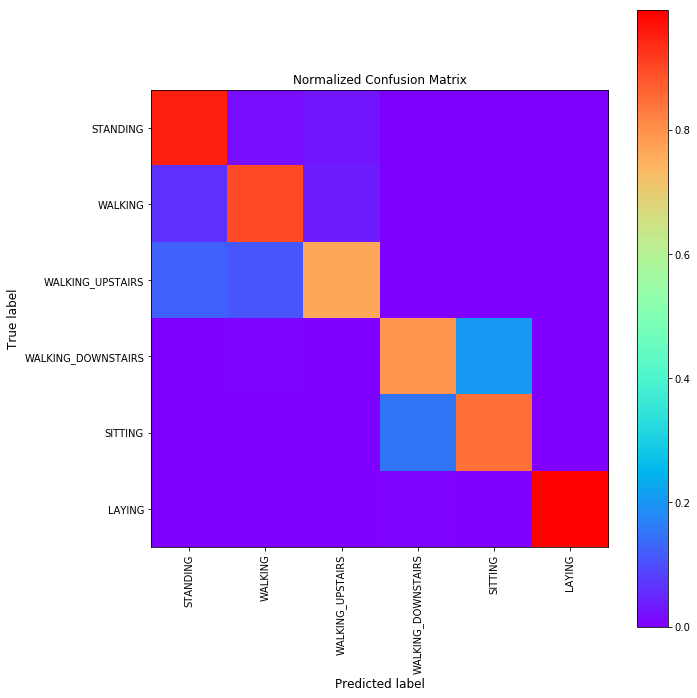


Mean Accuracy for KNN: 96.15%

Execution time (in seconds) =  31.826


In [16]:
print('\n**** RESULTS FOR KNN METHOD ****\n')
cmatrix_knn, accuracy_knn, execTimeKNN = runKNNeval()
cm_normalized_knn = cmatrix_knn.astype('float') / cmatrix_knn.sum(axis=1)[:,np.newaxis]

print('\nNormalized Confusion Matrix (values) for KNN method:\n\n', cm_normalized_knn)
plot(cm_normalized_knn)

print('\nMean Accuracy for KNN: ', end='')
print(accuracy_knn,end='')
print('%')

print('\nExecution time (in seconds) = ', float("{0:.3f}".format(execTimeKNN)))

#### Run Softmax based classification


**** RESULTS FOR Softmax METHOD ****

Cross-validation result for Softmax Regression method: [0.98133286547290099]
Total cases for Softmax Regression:  2947
Correct Prediction for Softmax Regression:  2826
Correct prediction rate for Softmax Regression:  0.9589412962334578

Classification Report for Softmax Regression method:

                     precision    recall  f1-score   support

          STANDING       1.00      1.00      1.00       361
           WALKING       0.99      1.00      0.99       311
  WALKING_UPSTAIRS       1.00      1.00      1.00       304
WALKING_DOWNSTAIRS       0.95      0.98      0.96       383
           SITTING       0.98      0.95      0.97       427
            LAYING       1.00      1.00      1.00       420

       avg / total       0.99      0.99      0.99      2206

Softmax Regression Confusion Matrix:

[[360   1   0   0   0   0]
 [  1 310   0   0   0   0]
 [  0   1 303   0   0   0]
 [  0   1   0 374   8   0]
 [  0   0   0  20 407   0]
 [  0   0   1

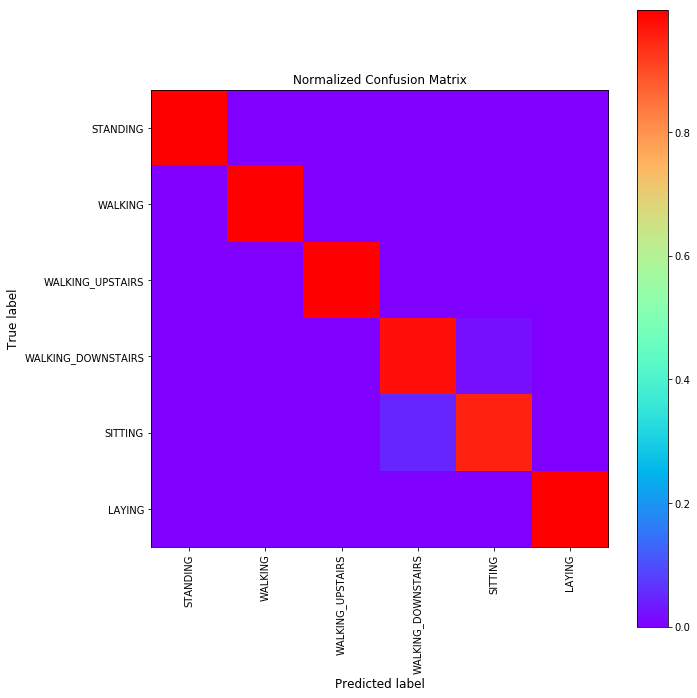


Mean Accuracy for Softmax: 98.5%

Execution time (in seconds) =  34.889


In [17]:
print('\n**** RESULTS FOR Softmax METHOD ****\n')
cmatrix_logr, accuracy_logr, execTimeSoft = runSoftMaxeval()
cm_normalized_logr = cmatrix_logr.astype('float') / cmatrix_logr.sum(axis=1)[:,np.newaxis]

print('\nNormalized Confusion Matrix (values) for Softmax Regression method:\n\n', cm_normalized_logr)
plot(cm_normalized_logr)

print('\nMean Accuracy for Softmax: ', end='')
print(accuracy_logr,end='')
print('%')

print('\nExecution time (in seconds) = ', float("{0:.3f}".format(execTimeSoft)))

#### Run SVM based classification


**** RESULTS FOR SVM METHOD ****

Cross-validation result for SVM method: [0.98347257059116411]
Total cases for SVM:  2947
Correct Prediction for SVM:  2841
Correct prediction rate for SVM:  0.9640312181879878

Classification Report for SVM method:

                     precision    recall  f1-score   support

          STANDING       0.96      0.99      0.97       496
           WALKING       0.98      0.96      0.97       471
  WALKING_UPSTAIRS       0.99      0.98      0.98       420
WALKING_DOWNSTAIRS       0.96      0.89      0.92       491
           SITTING       0.91      0.97      0.94       532
            LAYING       1.00      1.00      1.00       537

       avg / total       0.96      0.96      0.96      2947

SVM Confusion Matrix:

[[492   1   3   0   0   0]
 [ 18 451   2   0   0   0]
 [  4   6 410   0   0   0]
 [  0   2   0 435  54   0]
 [  0   0   0  16 516   0]
 [  0   0   0   0   0 537]]

Normalized Confusion Matrix (values) for SVM method:

 [[ 0.99193548  0.002016

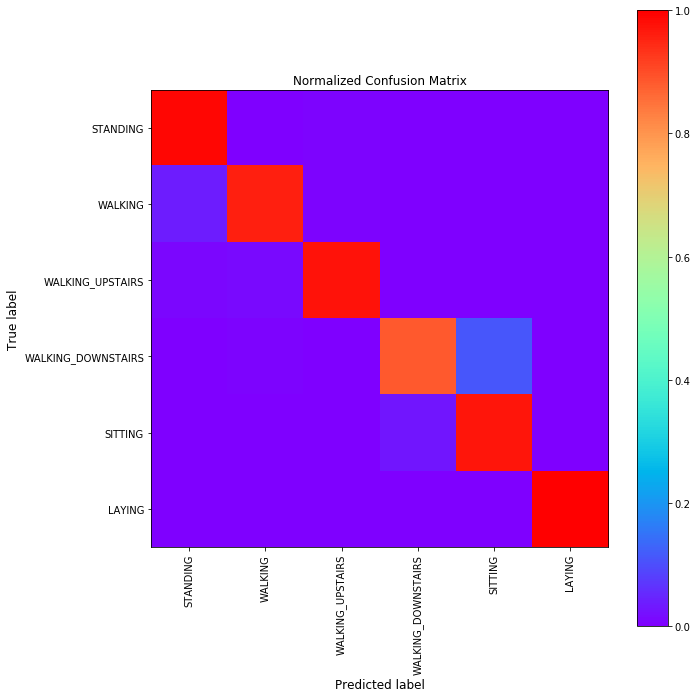


Mean Accuracy for SVM: 99.46%

Execution time (in seconds) =  10.729


In [18]:
print('\n**** RESULTS FOR SVM METHOD ****\n')
cmatrix_svm, accuracy_svm, execTimeSVM = runSVMeval()
cm_normalized_svm = cmatrix_svm.astype('float') / cmatrix_svm.sum(axis=1)[:,np.newaxis]

print('\nNormalized Confusion Matrix (values) for SVM method:\n\n', cm_normalized_svm)
plot(cm_normalized_svm)

print('\nMean Accuracy for SVM: ', end='')
print(accuracy_svm,end='')
print('%')

print('\nExecution time (in seconds) = ', float("{0:.3f}".format(execTimeSVM)))

### Results
Below is the summary of the results for each of the classification algorithm used.

The prediction rate of each algorithm we have -

1. KNN = 87.85%
2. Softmax regression = 95.89%
3. SVM = 96.40%

The mean accuracy of each algorithm we have -

1. KNN = 96.15%
2. Softmax regression = 98.5%
3. SVM = 99.46%

For execution time of each algorithm we have - 

1. KNN = 30.998 seconds
2. Softmax regression = 36.147 seconds
3. SVM = 11.313 seconds

From the confusion matrix for each algorithm we can see that KNN had a poorest result of the three methods. KNN method had some confounding between "Standing", "Walking Downstairs" and "Walking". KNN method also had confounding results between "Sitting" and "Laying". Overall KNN had a prediction rate of 87.85% and mean accuracy of 96.15%. SVM method on the other had confunding results between "Sitting" and "Laying". Overall SVM method had a prediction rate of 96.40% which is significantly better than KNN's prediction rate 87.58% and had a mean accuracy of 99.46% which is better than that of KNN's and marginally better than that of Softmax regression method. Softmax regression method had  minimal confounding in its classification results even though both its prediction rate and mean accuracy was marginally lower than that of SVM's. Overall Softmax regression had the highest average precision at 99% compared to SVM's 96% and KNN's 88%. Additionally, all three methods had confounding results between "Walking", "Walking Downstairs", "Standing" and marginally with "Sitting". This could be due to the fact the smartphone was mounted at the waist for the participants and  for these motions the measurements would not vary much at the waist for walking, standing and walking downstairs. Last but not the least SVM had the best execution time of about 11 seconds whereas both Softmax and KNN execution took about 3 times longer. So overall even though SVM had lower precision than Softmax due its faster execution time would be a good choice for multi-classification of data.

## References
1. UCI - http://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones#
2. SKLearn - http://scikit-learn.org/